# Hello and welcome to notebook 2!

In this notebook, we are going to perform some Exploratory Data Analysis (or EDA) on our data. This will include learning about:
* The `pandas` Python library
* Using the `seaborn` library to generate histograms
* Creating word clouds

It is recommended that you complete all exercises that are not marked as optional.

Feel free to be creative and write your own code wherever you want!

The provided functions are only there to help you if you get stuck :)

## Imports

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

## Lesson 1: Pandas

In this lesson we will explore our 'sarcastic headlines' dataset for the first time!

We'll be loading the data with the Python library `pandas` in an object called a `DataFrame`. 

This is essentially a table that we can use special `pandas` commands on to easily access and manipulate our data. 

In [7]:
# Define the path to the data
fp = '../data/train_df.csv'

# Load the data as a pandas DataFrame
df = pd.read_csv(fp)

# Calling .head() on a dataframe lets us see the first five rows
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


The following cells introduce some of the basic `DataFrame` operations. Some of them may seem confusing at first, but once you learn how to use `pandas` properly you'll come to love it!

If you ever get stuck with `pandas`, take a look at the documentation:
* https://pandas.pydata.org/pandas-docs/stable/index.html

It's really clear and helpful!

In [8]:
# We can access a single column of the dataframe like so:
df['headline']

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
15857    dukes of hazzard sharply declines in kitsch value
15858             arby's regional manager's work done here
15859    these stunning overhead beach photos are enoug...
15860    watch these dancers beautifully portray the ev...
15861    it easy to tell what area man will look like a...
Name: headline, Length: 15862, dtype: object

In [9]:
# Add .values to the end if you just want an array of the entries:
df['headline'].values

array(["former versace store clerk sues over secret 'black code' for minority shoppers",
       "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
       "mom starting to fear son's web series closest thing she will have to grandchild",
       ...,
       'these stunning overhead beach photos are enough last you to next summer',
       'watch these dancers beautifully portray the evolution of a relationship',
       'it easy to tell what area man will look like as skeleton'],
      dtype=object)

In [10]:
# Multiple columns are accessed using a list:
df[['is_sarcastic', 'headline']]

,is_sarcastic,headline
0,0,former versace store clerk sues over secret 'b...
1,0,the 'roseanne' revival catches up to our thorn...
2,1,mom starting to fear son's web series closest ...
3,1,"boehner just wants wife to listen, not come up..."
4,0,j.k. rowling wishes snape happy birthday in th...
...,...,...
15857,1,dukes of hazzard sharply declines in kitsch value
15858,1,arby's regional manager's work done here
15859,0,these stunning overhead beach photos are enoug...
15860,0,watch these dancers beautifully portray the ev...


In [11]:
# A single row can be pulled out using its index:
df.iloc[0]

article_link    https://www.huffingtonpost.com/entry/versace-b...
headline        former versace store clerk sues over secret 'b...
is_sarcastic                                                    0
Name: 0, dtype: object

In [12]:
# And we can access multiple rows using slicing...
df.iloc[2:5]

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [13]:
#...or a list
df.iloc[[1, 3, 7]]

,article_link,headline,is_sarcastic
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0


In [14]:
# A special type of indexing can be used to filter our dataframe down to sarcastic headlines only:
df[df.is_sarcastic == 1]

,article_link,headline,is_sarcastic
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
15,https://entertainment.theonion.com/nuclear-bom...,nuclear bomb detonates during rehearsal for 's...,1
16,https://www.theonion.com/cosby-lawyer-asks-why...,cosby lawyer asks why accusers didn't come for...,1
...,...,...,...
15852,https://www.theonion.com/q-tip-releases-new-mu...,q-tip releases new multi-pronged family swab,1
15853,https://politics.theonion.com/john-kelly-expla...,john kelly explains to furious trump that gold...,1
15857,https://entertainment.theonion.com/dukes-of-ha...,dukes of hazzard sharply declines in kitsch value,1
15858,https://www.theonion.com/arbys-regional-manage...,arby's regional manager's work done here,1


In [15]:
# Q1.2 - How many saracastic headlines are there?
#      - How many are genuine?
#      - Do you think the ratio of sarcastic headlines to genuine ones will allow us to train a good classifier?
print(len(df[df.is_sarcastic == 1]))
print(len(df[df.is_sarcastic == 0]))

6913
8949


In [16]:
# Q1.3 - Using the pandas documentation, work out how to add a new column 'headline_length' to 
#      - the dataframe that contains the length of (i.e. the number of characters in) each headline.
df["headline_length"]=df["headline"].str.len()
#      - Which headline is the longest?
#      - Which headline is the shortest?
#      - Is headline length something that we could use when classifying the sarcastic headlines?
max(df['headline_length'])


237

## Lesson 2: Histograms
Histograms are a great way to quickly visualise distributions within our data. In Python, they can be produced using the `matplotlib` or `seaborn` libraries. We'll use `seaborn` here as it has good integration with `pandas` and produces slightly prettier plots!

The function ```plot_headline_char_lengths``` plots histograms of the number of characters in the sarcastic and genuine headlines.

In [17]:
def plot_headline_char_lengths(df):
    # Get lists of the genuine headline lengths
    genuine = df[df['is_sarcastic'] == 0]
    lengths_genuine = genuine['headline_length']
    
    # Get a list of the sarcastic headline lengths
    sarcastic = df[df['is_sarcastic'] == 1]
    lengths_sarcastic = sarcastic['headline_length']
    
    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # Comment out one of the following two lines to plot distributions one at a time
    sns.histplot(lengths_genuine, label='0 - Genuine', color='blue')
    sns.histplot(lengths_sarcastic, label='1 - Sarcastic', color='red')
    
    plt.legend()

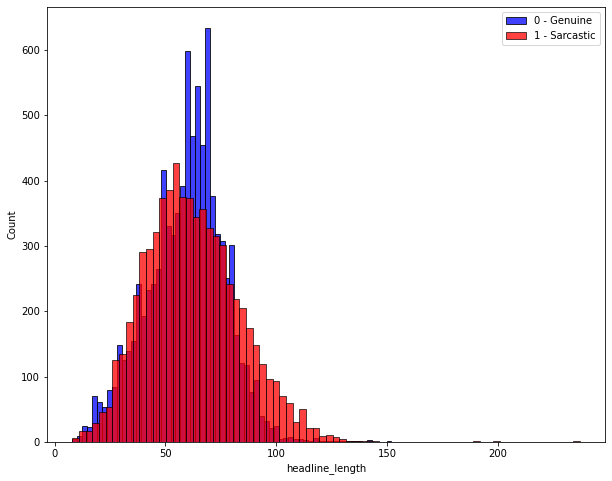

In [18]:
plot_headline_char_lengths(df)

In [19]:
# Q2.1 - What do you notice about the distribution of message lengths for the sarcastic
#        and non-sarcastic headlines? Is this what you'd expect? 
# 
# sarcastic headlines have a wider range of lengths, and more long ones

In [20]:
# Q2.2 - Use the new column 'headline_length' that you added to the dataframe in Q1.3 to improve
#      - the `plot_headline_char_lengths` function.

In [21]:
# Q2.3 - Complete the function ```plot_headline_word_count``` below.
#      - HINT: Remember the .split() method from the PreparingTextData notebook...?

In [61]:
def plot_headline_word_count(df):
    # TO DO: Get lists of word count for sarcastic and genuine
    sarcastic = (df[df['is_sarcastic']==1]['headline'])
    sarcasticSeparated = []
    for item in sarcastic:
        sarcasticSeparated.append(len(item.split(' ')))
    
        

    genuine = (df[df['is_sarcastic']==0]['headline'])
    genuineSeparated = []
    for item in genuine:
        genuineSeparated.append(len(item.split(' ')))
    # Set the plot size
    plt.figure(figsize=(10,8))
    
    # TO DO: Plot the histograms (distributions) for sarcastic and genuine
    sns.histplot(genuine, label='0 - Genuine', color="blue")
    sns.histplot(sarcastic, label='1 - Sarcastic', color="red")
    # Add a legend to the plot
    plt.legend()

In [60]:
plot_headline_word_count(df)

12, 9, 8, 6, 11, 11, 4, 8, 10, 15, 4, 14, 14, 11, 9, 8, 14, 21, 16, 10, 10, 11, 5, 7, 12, 8, 12, 7, 8, 10, 10, 18, 9, 16, 9, 12, 6, 12, 11, 13, 10, 11, 11, 5, 7, 9, 5, 4, 12, 16, 5, 8, 6, 11, 17, 9, 15, 5, 13, 13, 14, 7, 15, 13, 11, 10, 8, 5, 10, 4, 12, 10, 7, 7, 10, 17, 13, 6, 4, 14, 5, 14, 12, 18, 13, 5, 9, 15, 5, 14, 6, 12, 11, 8, 15, 9, 8, 10, 14, 6, 11, 7, 7, 14, 10, 18, 11, 7, 13, 10, 15, 8, 4, 7, 10, 13, 6, 9, 7, 13, 8, 11, 16, 15, 14, 13, 12, 11, 8, 4, 9, 5, 9, 7, 13, 9, 8, 8, 20, 13, 5, 9, 6, 18, 14, 13, 11, 12, 11, 10, 18, 15, 18, 10, 6, 14, 5, 9, 4, 8, 11, 11, 9, 5, 12, 6, 14, 5, 9, 14, 8, 9, 6, 9, 9, 6, 14, 10, 7, 10, 8, 10, 14, 9, 12, 6, 10, 9, 11, 6, 8, 15, 5, 10, 15, 11, 11, 9, 7, 17, 18, 4, 12, 14, 7, 10, 15, 9, 7, 13, 5, 17, 13, 15, 12, 11, 12, 16, 6, 9, 10, 10, 11, 9, 13, 16, 11, 8, 11, 13, 10, 7, 9, 8, 16, 8, 6, 8, 7, 8, 14, 10, 13, 15, 9, 11, 8, 4, 8, 14, 12, 15, 12, 7, 9, 11, 5, 8, 10, 9, 12, 13, 7, 6, 12, 5, 12, 10, 9, 21, 9, 10, 14, 9, 9, 8, 10, 11, 11, 12, 9, 11

KeyboardInterrupt: 

## Lesson 3: Word clouds
A word cloud is a way of visualising text data in which the size of each word depends on how often it occurs in the text. In this lesson we will create word clouds for the sets of all, sarcastic, and genuine headlines.

To start off, we use Python's `.join()` method to turn all of the headlines into one long string!

In [62]:
headlines = ' '.join(df['headline'].values)
print(headlines[:100])

former versace store clerk sues over secret 'black code' for minority shoppers the 'roseanne' reviva


In [64]:
# Q3.1 - Use the `.join()` method to write the word 'bananas' from the list ['b', 'n', 'n', 's']

list_to_join = ['b', 'n', 'n', 's'] # You're not allowed to modify this list!
word = 'a'.join(list_to_join)
print(word)
# TO DO: Use .join() with list_to_join to print the word 'bananas'

bananas


Now we can use the function `create_word_cloud` below to generate our word cloud!

In [119]:
def create_word_cloud(text):
    # Create a word cloud
    wc = WordCloud(background_color='white')
    wordcloud = wc.generate(text)
    # Display the generated image
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

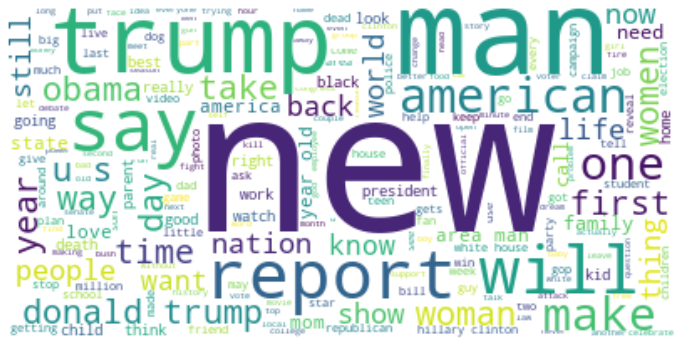

In [120]:
create_word_cloud(headlines)

In [28]:
# Q3.2 - Try changing some of the parameters of `WordCloud` in the `create_word_cloud` function.
#      - Can you produce a word cloud with black writing on a white background?
#      - HINT: You can open the docs for `WordCloud` by clicking after `WordCloud(` and pressing
#      - Shift + Tab.

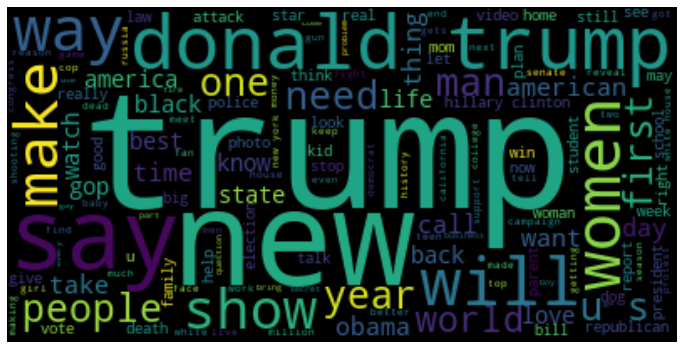

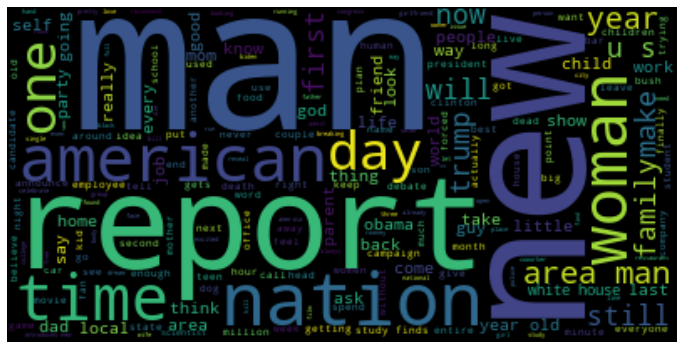

In [134]:
# Q3.3 - Produce two additional word clouds: one for the genuine headlines only, and one for
#      - the sarcastic headlines.
#      - What do you notice about the largest words in each cloud?

def create_genuine_wordcloud(df):
    text = (df[df['is_sarcastic']==0]['headline'])
    text = (' '.join(text))
    wc = WordCloud()
    wordcloud = wc.generate(text)

    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def create_sarcastic_wordcloud(df):
    text = (df[df['is_sarcastic']==1]['headline'])
    text = (' '.join(text))
    wc = WordCloud()
    wordcloud = wc.generate(text)

    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

create_genuine_wordcloud(df)
create_sarcastic_wordcloud(df)